In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [2]:
# Read catastro
catastro = pd.read_csv('db_catastro.csv')
catastro

,col_name,mun_code,prom_valor_unitario_suelo,latitud,longitud,alcaldia,estado
0,19 DE MAYO,1210,1404.400000,19.361649,-99.253530,Álvaro Obregón,CDMX
1,1RA VICTORIA,1150,2061.619503,19.386686,-99.201985,Álvaro Obregón,CDMX
2,1RA VICTORIA SECCION BOSQUES,1150,1788.360000,19.387826,-99.197446,Álvaro Obregón,CDMX
3,2DA JALALPA TEPITO (AMPL),1260,1063.626266,19.375080,-99.233736,Álvaro Obregón,CDMX
4,2DA EL PIRUL (AMPL),1210,1320.710000,19.379745,-99.242231,Álvaro Obregón,CDMX
...,...,...,...,...,...,...,...
1784,GUADALUPE,16900,420.703636,19.218264,-99.120799,Xochimilco,CDMX
1785,NATIVITAS LA JOYA (AMPL),16900,711.580672,19.237250,-99.093782,Xochimilco,CDMX
1786,SAN FRANCISCO TLALNEPANTLA (PBLO),16910,338.647387,19.197937,-99.122385,Xochimilco,CDMX
1787,SANTA CECILIA TEPETLAPA (PBLO),16880,534.238763,19.217187,-99.099325,Xochimilco,CDMX


<AxesSubplot:>

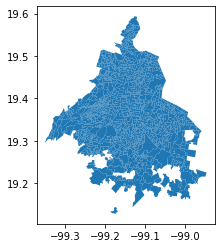

In [3]:
#import shape
# https://data.opendatasoft.com/explore/dataset/georef-mexico-colonia%40public/export/?disjunctive.sta_code&disjunctive.sta_name&disjunctive.mun_code&disjunctive.mun_name&disjunctive.col_code&disjunctive.col_name&location=10,19.36077,-99.14801&basemap=jawg.streets
cdmx= gpd.read_file('cdmx/georef-mexico-colonia-millesime.shp')
cdmx.plot()

In [4]:
# Geopandas Dataframe

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(catastro['longitud'], catastro['latitud'])]
catastro_df = gpd.GeoDataFrame(catastro, 
                          crs = crs, 
                          geometry = geometry)

D:\Users\raul.esqueda\Anaconda3\envs\PythonData\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
catastro_df.head()

,col_name,mun_code,prom_valor_unitario_suelo,latitud,longitud,alcaldia,estado,geometry
0,19 DE MAYO,1210,1404.400000,19.361649,-99.253530,Álvaro Obregón,CDMX,POINT (-99.25353 19.36165)
1,1RA VICTORIA,1150,2061.619503,19.386686,-99.201985,Álvaro Obregón,CDMX,POINT (-99.20199 19.38669)
2,1RA VICTORIA SECCION BOSQUES,1150,1788.360000,19.387826,-99.197446,Álvaro Obregón,CDMX,POINT (-99.19745 19.38783)
3,2DA JALALPA TEPITO (AMPL),1260,1063.626266,19.375080,-99.233736,Álvaro Obregón,CDMX,POINT (-99.23374 19.37508)
4,2DA EL PIRUL (AMPL),1210,1320.710000,19.379745,-99.242231,Álvaro Obregón,CDMX,POINT (-99.24223 19.37975)


Text(0.5, 1.0, 'Area (colonia) with Land Price information')

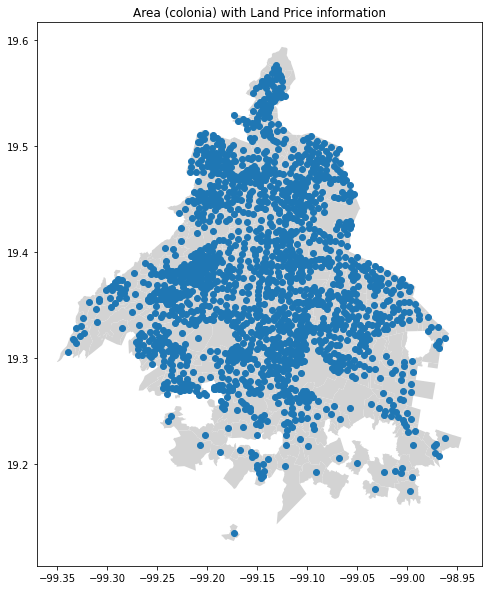

In [7]:
# Visualization

fig, ax = plt.subplots(figsize = (10,10))
cdmx.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
catastro_df.plot(ax=ax)
ax.set_title('Area (colonia) with Land Price information')

Text(0.5, 1.0, 'Average Price Land in Mexico City')

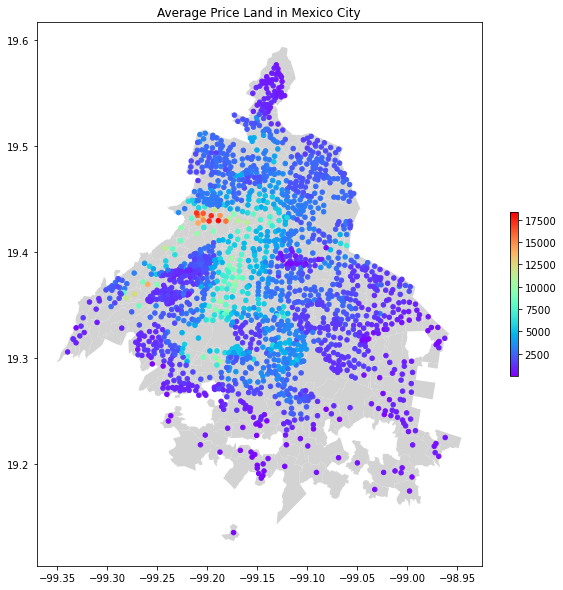

In [8]:
# Heatmap

fig, ax = plt.subplots(figsize = (10,10))
cdmx.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
catastro_df.plot(column = 'prom_valor_unitario_suelo', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 20)
ax.set_title('Average Price Land in Mexico City')